In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from sklearn.impute import KNNImputer

# property data

In [2]:
df = pd.read_csv('0228_property_data_SWH_ALL.csv')

/Users/suixinwa/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [4]:
df.columns

Index(['PROPERTY_ID', 'MARKETID', 'MARKET_NAME', 'SUBMARKET_CODE',
       'SUBMARKET_NAME', 'COUNTY_NAME', 'PROPERTY_NAME', 'PROPERTY_PRIORNAMES',
       'PROPERTY_ADDRESS', 'PROPERTY_CITY', 'PROPERTY_STATE',
       'PROPERTY_ZIPCODE', 'PROPERTY_LATITUDE', 'PROPERTY_LONGITUDE',
       'PROPERTY_PHONE', 'PROPERTY_UNITS', 'PROPERTY_SQFT', 'PROPERTY_ACRES',
       'PROPERTY_IMPRATING', 'PROPERTY_LOCRATING', 'PROPERTY_STATUS',
       'PROPERTY_DATE_PLANNED', 'PROPERTY_DATE_UNDERCONSTRUCTION',
       'PROPERTY_DATE_RENTUP', 'PROPERTY_DATECOMPLETED',
       'PROPERTY_CURRENT_OCCUPANCY', 'PROPERTY_CURRENT_RENT',
       'PROPERTY_MATRIX_URL', 'REGION', 'RENT_SQFT',
       'UNDER_CONSTRUCTION_RATIO', 'AGE', 'HOSPITAL', 'wholefood', 'state#',
       'county#', 'tract#', 'starbucks1', 'wholefood1', 'hospital1',
       'starbucks2', 'wholefood2', 'hospital2', 'starbucks3', 'wholefood3',
       'hospital3', 'starbucks4', 'wholefood4', 'hospital4', 'starbucks5',
       'wholefood5', 'hospital5'],
  

In [5]:
df.shape

(22453, 52)

In [6]:
df.columns

Index(['PROPERTY_ID', 'MARKETID', 'MARKET_NAME', 'SUBMARKET_CODE',
       'SUBMARKET_NAME', 'COUNTY_NAME', 'PROPERTY_NAME', 'PROPERTY_PRIORNAMES',
       'PROPERTY_ADDRESS', 'PROPERTY_CITY', 'PROPERTY_STATE',
       'PROPERTY_ZIPCODE', 'PROPERTY_LATITUDE', 'PROPERTY_LONGITUDE',
       'PROPERTY_PHONE', 'PROPERTY_UNITS', 'PROPERTY_SQFT', 'PROPERTY_ACRES',
       'PROPERTY_IMPRATING', 'PROPERTY_LOCRATING', 'PROPERTY_STATUS',
       'PROPERTY_DATE_PLANNED', 'PROPERTY_DATE_UNDERCONSTRUCTION',
       'PROPERTY_DATE_RENTUP', 'PROPERTY_DATECOMPLETED',
       'PROPERTY_CURRENT_OCCUPANCY', 'PROPERTY_CURRENT_RENT',
       'PROPERTY_MATRIX_URL', 'REGION', 'RENT_SQFT',
       'UNDER_CONSTRUCTION_RATIO', 'AGE', 'HOSPITAL', 'wholefood', 'state#',
       'county#', 'tract#', 'starbucks1', 'wholefood1', 'hospital1',
       'starbucks2', 'wholefood2', 'hospital2', 'starbucks3', 'wholefood3',
       'hospital3', 'starbucks4', 'wholefood4', 'hospital4', 'starbucks5',
       'wholefood5', 'hospital5'],
  

In [7]:
state_filter = df['state#'].value_counts().index
state_filter

Int64Index([48, 12, 13, 37, 4, 8, 47, 45, 32, 40, 1, 49, 22, 21, 35, 5, 28, 16,
            18],
           dtype='int64')

In [8]:
df["AGE"] = datetime.datetime.now().year - pd.to_datetime(df["PROPERTY_DATECOMPLETED"]).dt.year

# census

In [9]:
tract = pd.read_csv('tract_covariates.csv')

In [10]:
tract.shape

(74044, 38)

In [11]:
tract = tract[tract['state'].isin(state_filter)]
tract = tract.reset_index(drop = True)

In [12]:
tract.shape

(28479, 38)

In [13]:
tract = tract.drop(['cz'], axis = 1)

In [14]:
tract.head()

,state,county,tract,czname,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2000,frac_coll_plus2010,foreign_share2010,med_hhinc1990,...,singleparent_share2000,traveltime15_2010,emp2000,mail_return_rate2010,ln_wage_growth_hs_grad,jobs_total_5mi_2015,jobs_highpay_5mi_2015,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013
0,1,1,20100,Montgomery,68638.727,26.171911,0.156479,0.254428,0.009950,27375.0,...,0.250980,0.273034,0.567308,83.500000,0.038233,10109.0,3396.0,504.75183,-0.006769,92.133049
1,1,1,20200,Montgomery,57242.512,24.806705,0.146932,0.267194,0.016337,19000.0,...,0.392523,0.152040,0.493169,81.300003,0.089306,9948.0,3328.0,1682.17050,-0.004253,971.317870
2,1,1,20300,Montgomery,75647.727,25.322525,0.224413,0.164159,0.027096,29419.0,...,0.244856,0.205534,0.578560,79.500000,-0.177743,10387.0,3230.0,1633.41390,0.014218,340.920070
3,1,1,20400,Montgomery,74852.055,22.965347,0.230469,0.252744,0.015083,37891.0,...,0.190722,0.350673,0.596501,83.500000,-0.072311,12933.0,3635.0,1780.03250,-0.019841,207.386370
4,1,1,20500,Montgomery,96174.766,26.222353,0.321154,0.375063,0.046488,41516.0,...,0.168000,0.250496,0.661268,77.300003,-0.096140,12933.0,3635.0,2446.26220,0.018627,800.272640


Text(0.5, 1.0, 'count of missing values')

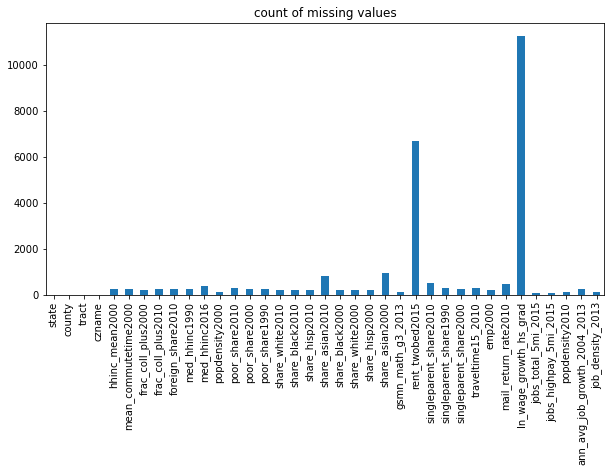

In [15]:
plt.figure(figsize=(10,5))
pd.Series(tract.isnull().sum()).plot.bar()
plt.title('count of missing values')

In [16]:
tract_sub = tract.copy().iloc[:, 4:]
tract_sub.head()

,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2000,frac_coll_plus2010,foreign_share2010,med_hhinc1990,med_hhinc2016,popdensity2000,poor_share2010,poor_share2000,...,singleparent_share2000,traveltime15_2010,emp2000,mail_return_rate2010,ln_wage_growth_hs_grad,jobs_total_5mi_2015,jobs_highpay_5mi_2015,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013
0,68638.727,26.171911,0.156479,0.254428,0.009950,27375.0,66000.0,195.72380,0.105030,0.126816,...,0.250980,0.273034,0.567308,83.500000,0.038233,10109.0,3396.0,504.75183,-0.006769,92.133049
1,57242.512,24.806705,0.146932,0.267194,0.016337,19000.0,41107.0,566.38141,0.147590,0.227058,...,0.392523,0.152040,0.493169,81.300003,0.089306,9948.0,3328.0,1682.17050,-0.004253,971.317870
2,75647.727,25.322525,0.224413,0.164159,0.027096,29419.0,51250.0,624.19684,0.080385,0.076640,...,0.244856,0.205534,0.578560,79.500000,-0.177743,10387.0,3230.0,1633.41390,0.014218,340.920070
3,74852.055,22.965347,0.230469,0.252744,0.015083,37891.0,52704.0,713.80396,0.063223,0.045485,...,0.190722,0.350673,0.596501,83.500000,-0.072311,12933.0,3635.0,1780.03250,-0.019841,207.386370
4,96174.766,26.222353,0.321154,0.375063,0.046488,41516.0,52463.0,529.93030,0.059569,0.036792,...,0.168000,0.250496,0.661268,77.300003,-0.096140,12933.0,3635.0,2446.26220,0.018627,800.272640


In [17]:
tract_sub.shape

(28479, 33)

In [18]:
imputer = KNNImputer(n_neighbors = 5, weights = "uniform")
tract_sub = imputer.fit_transform(tract_sub) 

In [19]:
tract_sub = pd.DataFrame(tract_sub)
tract_sub.columns = tract.columns[4:]

In [20]:
tract_sub.isnull().sum()

hhinc_mean2000                  0
mean_commutetime2000            0
frac_coll_plus2000              0
frac_coll_plus2010              0
foreign_share2010               0
med_hhinc1990                   0
med_hhinc2016                   0
popdensity2000                  0
poor_share2010                  0
poor_share2000                  0
poor_share1990                  0
share_white2010                 0
share_black2010                 0
share_hisp2010                  0
share_asian2010                 0
share_black2000                 0
share_white2000                 0
share_hisp2000                  0
share_asian2000                 0
gsmn_math_g3_2013               0
rent_twobed2015                 0
singleparent_share2010          0
singleparent_share1990          0
singleparent_share2000          0
traveltime15_2010               0
emp2000                         0
mail_return_rate2010            0
ln_wage_growth_hs_grad          0
jobs_total_5mi_2015             0
jobs_highpay_5

In [21]:
tract_sub.shape

(28479, 33)

In [22]:
tract.shape

(28479, 37)

In [23]:
tract = pd.concat([tract.iloc[:,:4], tract_sub], axis = 1)

# merge

In [24]:
(np.sort(tract.state.unique()) == np.sort(df['state#'].unique())).sum()

19

In [25]:
type(tract.county) == type(df['county#'])

True

In [26]:
np.sort(tract.county.unique())

array([  1,   3,   5,   6,   7,   9,  11,  12,  13,  14,  15,  17,  19,
        21,  23,  25,  27,  28,  29,  31,  33,  35,  37,  39,  41,  43,
        45,  47,  49,  51,  53,  55,  57,  59,  61,  63,  65,  67,  69,
        71,  73,  75,  77,  79,  81,  83,  85,  86,  87,  89,  91,  93,
        95,  97,  99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119,
       121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145,
       147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171,
       173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197,
       199, 201, 203, 205, 207, 209, 211, 213, 215, 217, 219, 221, 223,
       225, 227, 229, 231, 233, 235, 237, 239, 241, 243, 245, 247, 249,
       251, 253, 255, 257, 259, 261, 263, 265, 267, 269, 271, 273, 275,
       277, 279, 281, 283, 285, 287, 289, 291, 293, 295, 297, 299, 301,
       303, 305, 307, 309, 311, 313, 315, 317, 319, 321, 323, 325, 327,
       329, 331, 333, 335, 337, 339, 341, 343, 345, 347, 349, 35

In [27]:
np.sort(df['county#'].unique())

array([  1,   3,   5,   7,   9,  11,  13,  14,  15,  17,  19,  21,  25,
        27,  28,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,
        51,  53,  55,  57,  59,  61,  63,  67,  69,  71,  73,  77,  79,
        81,  83,  85,  86,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 157, 159,
       163, 165, 167, 169, 179, 183, 185, 187, 189, 201, 207, 209, 211,
       215, 217, 219, 221, 225, 227, 231, 245, 247, 249, 251, 257, 273,
       303, 309, 329, 339, 349, 355, 367, 375, 381, 397, 409, 439, 453,
       473, 491, 510])

In [28]:
type(tract.tract) == type(df['tract#'])

True

In [29]:
np.sort(tract.tract.unique())

array([   100,    101,    102, ..., 990000, 990100, 990200])

In [30]:
np.sort(df['tract#'].unique())

array([   100,    101,    102, ..., 980100, 980500, 980600])

In [31]:
tract = tract.rename(columns = {'county':'county#','state':'state#','tract':'tract#'})

In [32]:
dfFinal = df.merge(tract, on = ['state#', 'county#', 'tract#'], how = 'left')

In [33]:
dfFinal.isnull().sum().sum() == df.isnull().sum().sum()

True

In [36]:
stateDict = {1:'AL',4:'AZ',5:'AR',8:'CO',12:'FL',13:'GA',16:'ID',18:'IN',21:'KY',
             22:'LA',28:'MS',32:'NV',35:'NM',37:'NC',40:'OK',45:'SC',47:'TN',48:'TX',49:'UT'}

In [37]:
dfFinal['stateName'] = dfFinal['state#'].map(lambda x: stateDict[x])

In [38]:
dfFinal.to_csv('0305_property_data_imputed.csv')